In [1]:
import pandas as pd

In [2]:
X_train_scaled=pd.read_csv('X_train_scaled.csv')

In [3]:
X_train_scaled.shape

(5455, 69)

In [4]:
c_names=[" Liability-Assets Flag"]

In [5]:
#--------- cat as categorical num as scaled---> X_train_famd
# FAMD for X_train_scaled
import altair as alt
alt.data_transformers.enable('vegafusion')

X_train_famd=X_train_scaled
X_train_famd[c_names] = X_train_famd[c_names].astype('category')

import prince

famd=prince.FAMD(n_components=30)
famd_comp=famd.fit_transform(X_train_famd)

famd_comp.head()

famd.eigenvalues_summary

famd.plot(
    X_train_famd,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [6]:
famd.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,6.090,8.89%,8.89%
1,4.211,6.15%,15.04%
2,3.316,4.84%,19.88%
3,2.467,3.60%,23.48%
4,2.360,3.45%,26.92%
5,2.187,3.19%,30.12%
6,1.919,2.80%,32.92%
7,1.868,2.73%,35.64%
8,1.817,2.65%,38.30%


In [7]:
import sys
print(sys.executable)
!which pip

!{sys.executable} -m pip install "pyarrow>=10.0.1"


/Library/Frameworks/Python.framework/Versions/3.10/bin/python3
/Users/pasindumadusanka/.pyenv/versions/3.10.13/bin/pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip


k=2, Silhouette Score=0.1264
k=3, Silhouette Score=0.1270
k=4, Silhouette Score=0.1243
k=5, Silhouette Score=0.1244
k=6, Silhouette Score=0.1245
k=7, Silhouette Score=0.1248
k=8, Silhouette Score=0.1021
k=9, Silhouette Score=0.1029
k=10, Silhouette Score=0.1029


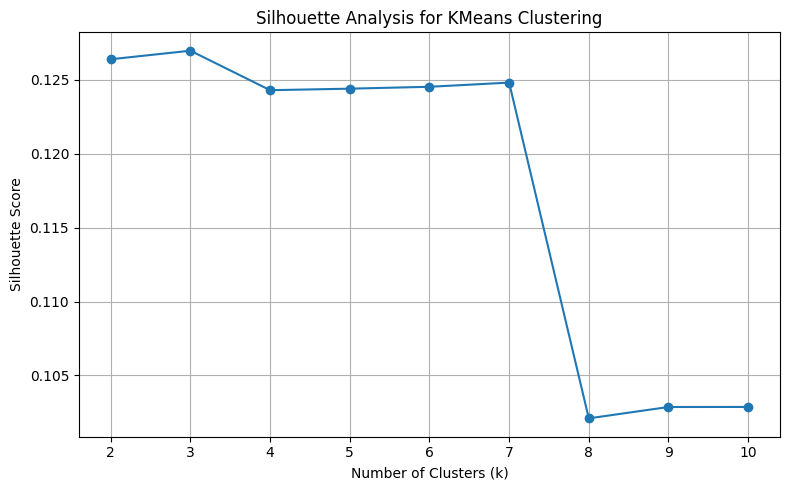

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

comp=famd_comp
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(comp)
    score = silhouette_score(comp, labels)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score={score:.4f}')

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.grid(True)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()


In [29]:
!Y

zsh:1: command not found: Y
